In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [3]:
#This header file contains all the common packages
%matplotlib inline
%run header.py $shape_cat $vol $z_range 
%run -i func.py  
%run -i corr_func.py  

In [4]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

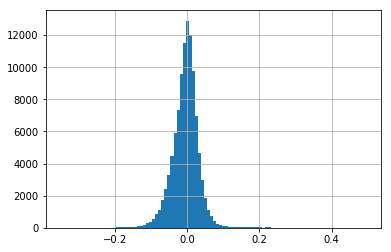

0.03805941343307495


In [18]:
dz = members[('All', 'ZRED2')] - members[('All', 'Z')]
dz.hist(bins=100)
plt.show()
print(dz.std())

In [5]:
# if vol!="uber":
#     members=shapes

In [6]:
if quantile!="":
    i=int(quantile)

In [7]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [8]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [9]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [10]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [11]:
NBINS=10

In [12]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [13]:
len(shapes)

105029

In [14]:
len(members)

105029

In [15]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [16]:
ng_abs=get_ng_list('abs', False)
ng_rel=get_ng_list('rel', False)

4322it [00:25, 170.46it/s]
13it [00:00, 128.03it/s]

Number of empty sat catalogs is 0


4322it [00:22, 189.30it/s]

Number of empty sat catalogs is 0


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [18]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

In [20]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [21]:
if key!="":
    np.savez("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [22]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/global/project/projectdirs/des/zhou/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [23]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [24]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
3007939007    0.408113
3007939125    0.408113
3007941517    0.408113
3007941644    0.408113
3007941684    0.408113
3007941775    0.408113
3007941915    0.408113
3007941974    0.408113
3007942055    0.408113
3007944213    0.408113
3007944262    0.408113
3007944424    0.408113
3007944442    0.408113
3007944591    0.408113
3007944816    0.408113
3007944907    0.408113
3007945120    0.408113
3007945165    0.408113
3007945179    0.408113
3007947355    0.408113
3007947497    0.408113
3007947631    0.408113
3007947742    0.408113
3007947936    0.408113
3007947996    0.408113
                ...   
3159867562    0.657482
3159867613    0.657482
3159868278    0.657482
3159902051    0.392961
3159902961    0.392961
3159903152    0.392961
3159903244    0.392961
3159903463    0.392961
3159904225    0.392961
3159904377    0.392961
3159904656    0.392961
3159904704    0.392961
31599051

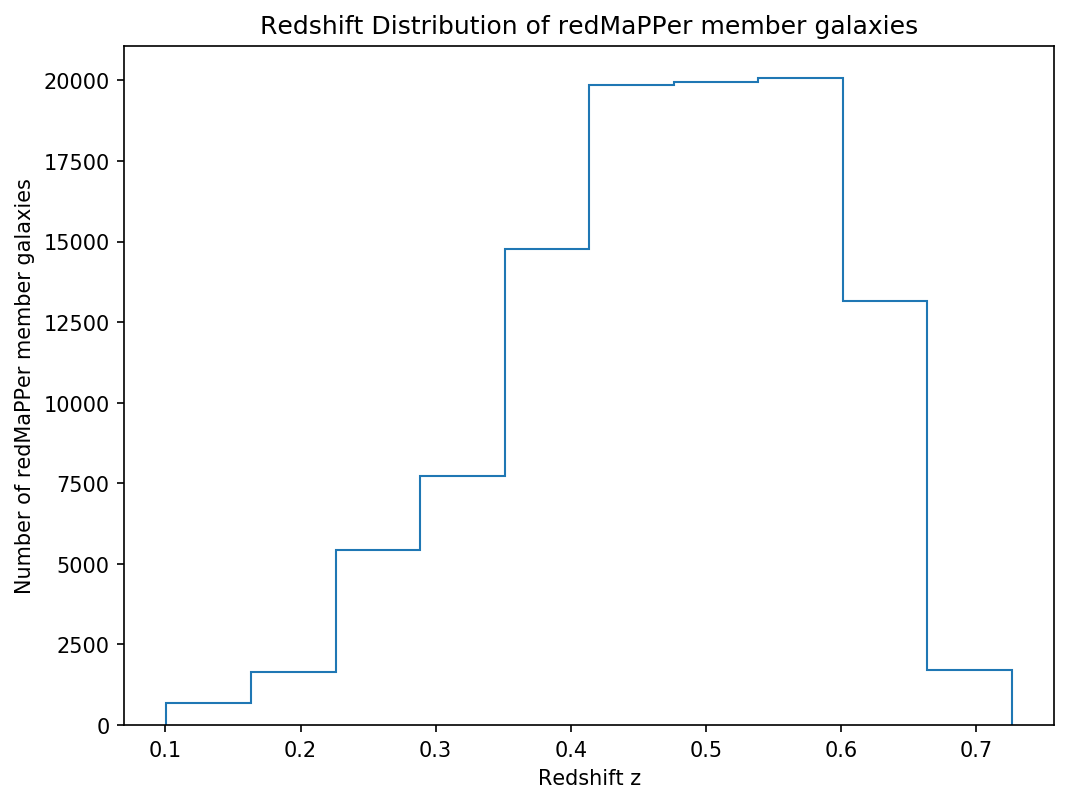

In [25]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','Z')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[ -5.0841  -4.5195  -2.3328 -10.0936  -2.4359 -11.002   -8.3528   8.9621
  14.0266 -16.9691]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3292.0816  -6271.9862  -8715.7173 -12389.0767 -17198.4768 -22259.7214
 -25051.9586 -22523.4493 -12767.2177  -1338.3202]
------------------------------------------------------------------------------
Aggregated npairs:
[  761.  1627.  2572.  4272.  7100. 11481. 17120. 22818. 24649.  8133.]
------------------------------------------------------------------------------
Mean xi:
[-0.0067 -0.0028 -0.0009 -0.0024 -0.0003 -0.001  -0.0005  0.0004  0.0006
 -0.0021]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.326  -3.8549 -3.3887 -2.9001 -2.4223 -1.9388 -1.4633 -0.9871 -0.518
 -0.1646]
------------------------------------------------------------------------------


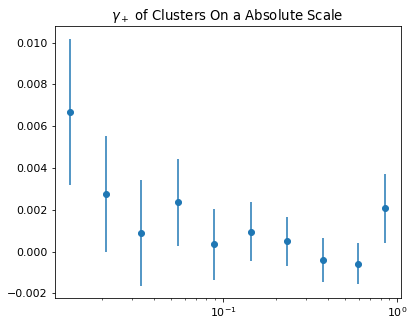

In [26]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


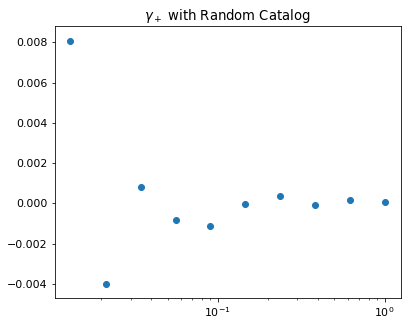

In [27]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

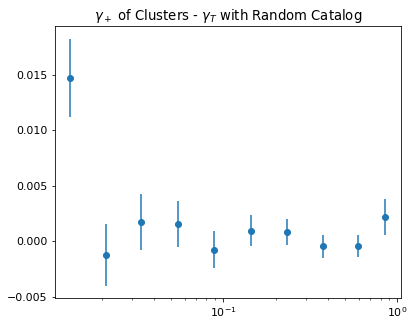

In [28]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[ -3.2982  -1.0694 -12.5055  -1.7997  -1.5501  -5.8067  -4.0446  15.7086
 -26.3428   2.4246]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1794.2648  -4367.6069  -7203.8497  -9568.6451 -13376.0262 -17685.9487
 -20861.6353 -20151.127  -13193.8657  -2000.5896]
------------------------------------------------------------------------------
Aggregated npairs:
[  417.  1132.  2123.  3292.  5506.  9063. 14135. 20072. 24791. 20118.]
------------------------------------------------------------------------------
Mean xi:
[-0.0079 -0.0009 -0.0059 -0.0005 -0.0003 -0.0006 -0.0003  0.0008 -0.0011
  0.0001]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3028 -3.8583 -3.3932 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5322
 -0.0994]
------------------------------------------------------------------------------


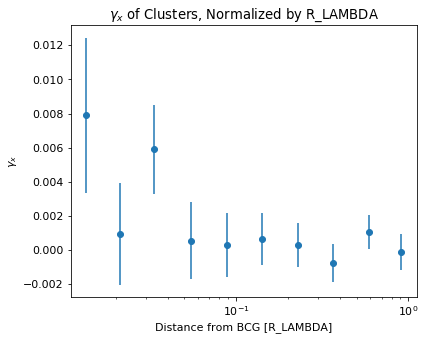

In [43]:
plt_w_error(mean_rel[1],mean_rel[0],sig_rel,r"$\gamma_x$ of Clusters, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"$\gamma_x$")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/gamma_x_rel.pdf")
print_data(sum_rel,mean_rel)

In [30]:
print("Error bar size")
print(sig_rel)

Error bar size
[0.0045 0.003  0.0026 0.0022 0.0019 0.0015 0.0013 0.0011 0.001  0.0011]


In [31]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

3.18617819366352

In [32]:
len(cov_rel)

10

In [33]:
cov_rel

array([[ 2.0649e-05,  8.4287e-08, -1.6133e-07, -1.6091e-07,  5.3978e-08,
         1.6674e-07, -2.3408e-08,  5.2084e-09, -7.8844e-08, -2.9750e-08],
       [ 8.4287e-08,  8.9489e-06,  1.0017e-07,  5.7019e-09, -8.8495e-08,
         4.0107e-08, -2.9202e-08, -9.1377e-08, -3.2162e-08,  3.5791e-08],
       [-1.6133e-07,  1.0017e-07,  6.7987e-06,  1.2507e-07,  6.8667e-08,
        -4.1423e-10, -2.7556e-08, -9.6256e-08,  9.1723e-09, -6.2739e-08],
       [-1.6091e-07,  5.7019e-09,  1.2507e-07,  5.0289e-06,  7.7404e-09,
         1.2419e-08, -1.3999e-08,  1.1337e-08, -2.9643e-08,  4.3124e-08],
       [ 5.3978e-08, -8.8495e-08,  6.8667e-08,  7.7404e-09,  3.4810e-06,
        -3.1657e-08, -8.5339e-08,  1.6368e-08,  1.7320e-08,  8.3206e-09],
       [ 1.6674e-07,  4.0107e-08, -4.1423e-10,  1.2419e-08, -3.1657e-08,
         2.3696e-06,  3.3117e-08, -2.4037e-08,  3.5199e-08,  1.3102e-08],
       [-2.3408e-08, -2.9202e-08, -2.7556e-08, -1.3999e-08, -8.5339e-08,
         3.3117e-08,  1.6082e-06,  1.6503e-08

In [34]:
cov_rel.min()

-1.6132900096244008e-07

In [35]:
cov_rel.max()

2.06491660172243e-05

In [36]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['0.01', '0.02', '0.03', '0.05', '0.09', '0.14', '0.23', '0.37', '0.59', '0.91']


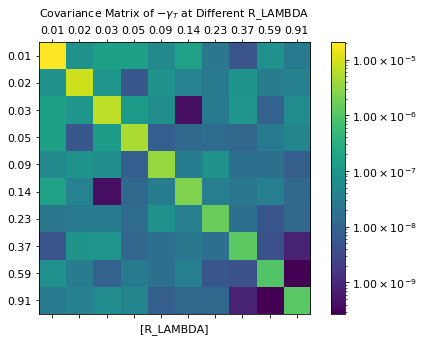

In [37]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $\gamma_x$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/home/adt35/des_y1_catalog/sa-master/images/cov.pdf')

In [38]:
# print(f.number)

In [39]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

array([ -392.785 ,   -90.9314,  -862.7288,  -107.8303,   -64.2762,
        -217.195 ,  -209.0416,   557.8073, -1089.6628,    56.3259])

In [40]:
mean_rel[0]

array([-0.0079, -0.0009, -0.0059, -0.0005, -0.0003, -0.0006, -0.0003,
        0.0008, -0.0011,  0.0001])

In [41]:
cov_rel

array([[ 2.0649e-05,  8.4287e-08, -1.6133e-07, -1.6091e-07,  5.3978e-08,
         1.6674e-07, -2.3408e-08,  5.2084e-09, -7.8844e-08, -2.9750e-08],
       [ 8.4287e-08,  8.9489e-06,  1.0017e-07,  5.7019e-09, -8.8495e-08,
         4.0107e-08, -2.9202e-08, -9.1377e-08, -3.2162e-08,  3.5791e-08],
       [-1.6133e-07,  1.0017e-07,  6.7987e-06,  1.2507e-07,  6.8667e-08,
        -4.1423e-10, -2.7556e-08, -9.6256e-08,  9.1723e-09, -6.2739e-08],
       [-1.6091e-07,  5.7019e-09,  1.2507e-07,  5.0289e-06,  7.7404e-09,
         1.2419e-08, -1.3999e-08,  1.1337e-08, -2.9643e-08,  4.3124e-08],
       [ 5.3978e-08, -8.8495e-08,  6.8667e-08,  7.7404e-09,  3.4810e-06,
        -3.1657e-08, -8.5339e-08,  1.6368e-08,  1.7320e-08,  8.3206e-09],
       [ 1.6674e-07,  4.0107e-08, -4.1423e-10,  1.2419e-08, -3.1657e-08,
         2.3696e-06,  3.3117e-08, -2.4037e-08,  3.5199e-08,  1.3102e-08],
       [-2.3408e-08, -2.9202e-08, -2.7556e-08, -1.3999e-08, -8.5339e-08,
         3.3117e-08,  1.6082e-06,  1.6503e-08

In [42]:
np.linalg.inv(cov_rel)

array([[ 4.8500e+04, -4.5361e+02,  1.1442e+03,  1.5486e+03, -8.2437e+02,
        -3.5041e+03,  7.8565e+02, -2.1562e+02,  4.0146e+03,  1.3387e+03],
       [-4.5361e+02,  1.1192e+05, -1.6032e+03, -6.1511e+01,  2.8713e+03,
        -1.8060e+03,  2.0898e+03,  8.0662e+03,  3.6655e+03, -3.5862e+03],
       [ 1.1442e+03, -1.6032e+03,  1.4749e+05, -3.7241e+03, -2.9710e+03,
         9.5335e+00,  2.2670e+03,  1.1413e+04, -1.3223e+03,  8.3973e+03],
       [ 1.5486e+03, -6.1511e+01, -3.7241e+03,  1.9911e+05, -3.6717e+02,
        -1.2513e+03,  1.6819e+03, -2.1538e+03,  6.1536e+03, -7.6666e+03],
       [-8.2437e+02,  2.8713e+03, -2.9710e+03, -3.6717e+02,  2.8787e+05,
         3.6913e+03,  1.5192e+04, -3.9775e+03, -5.0406e+03, -2.2436e+03],
       [-3.5041e+03, -1.8060e+03,  9.5335e+00, -1.2513e+03,  3.6913e+03,
         4.2280e+05, -8.7804e+03,  8.1306e+03, -1.5442e+04, -4.9611e+03],
       [ 7.8565e+02,  2.0898e+03,  2.2670e+03,  1.6819e+03,  1.5192e+04,
        -8.7804e+03,  6.2306e+05, -8.3660e+03

In [46]:
np.matmul(np.matmul(mean_rel[0], np.linalg.inv(cov_rel)), mean_rel[0])*np.dot(mean_rel[0], np.dot(np.linalg.inv(cov_rel), mean_rel[0]))

103.05765207810082

In [47]:
np.sum(mean_rel[0]**2/np.diagonal(cov_rel))

10.185226433561821

In [49]:
np.all(np.linalg.eigvals(cov_rel)>0)

True

In [50]:
np.matmul(np.matmul(mean_rel[0], np.linalg.inv(cov_rel)), mean_rel[0])

10.15173148177693

In [51]:
np.dot(mean_rel[0], np.dot(np.linalg.inv(cov_rel), mean_rel[0]))

10.15173148177693